We got the best out of sample mse when using method 2, so we will be
using that to determine U and V

In [5]:
import matplotlib.pyplot as plt
from method2utils import train_model, get_err
from scipy.sparse.linalg import svds
import pickle
import numpy as np

In [2]:
# Import the data
Y_train = pickle.load((open("data/y_train.p", "rb")))
Y_test = pickle.load((open("data/y_test.p", "rb")))

num_users = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int)
num_movies = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int)

In [3]:
# Parameters to use
K = 20
eta = 0.02
reg = 0.1
# Find U and V
U, V, _, _, _, _ = \
        train_model(num_users, num_movies, K, eta, reg, Y_train)

Epoch 1, E_in (regularized MSE): 0.4416103428542984
Epoch 2, E_in (regularized MSE): 0.4121556718154584
Epoch 3, E_in (regularized MSE): 0.3998124653679524
Epoch 4, E_in (regularized MSE): 0.3912287955899796
Epoch 5, E_in (regularized MSE): 0.38300367985237177
Epoch 6, E_in (regularized MSE): 0.3742917737446095
Epoch 7, E_in (regularized MSE): 0.3655842002313905
Epoch 8, E_in (regularized MSE): 0.35644930063846375
Epoch 9, E_in (regularized MSE): 0.3479033059291934
Epoch 10, E_in (regularized MSE): 0.3401977130956707
Epoch 11, E_in (regularized MSE): 0.333149487321539
Epoch 12, E_in (regularized MSE): 0.32600041508695604
Epoch 13, E_in (regularized MSE): 0.31957745988198055
Epoch 14, E_in (regularized MSE): 0.31348533552042623
Epoch 15, E_in (regularized MSE): 0.3085522438491729
Epoch 16, E_in (regularized MSE): 0.30351813194128685
Epoch 17, E_in (regularized MSE): 0.29923195584229173
Epoch 18, E_in (regularized MSE): 0.2952922788950381
Epoch 19, E_in (regularized MSE): 0.2914969243818

In [90]:
# Do SVD on V to find two dimensions with greatest variance
A, _, _ = svds(V.T, k = 2)
A = np.array(A)

# Project U and Vonto these two dimensions
proj_v = np.dot(V, A)
proj_u = np.dot(U, A)

In [91]:
# Load data about the movies
movies = pickle.load((open("data/movies.p", "rb")))
ratings = pickle.load((open("data/ratings.p", "rb")))

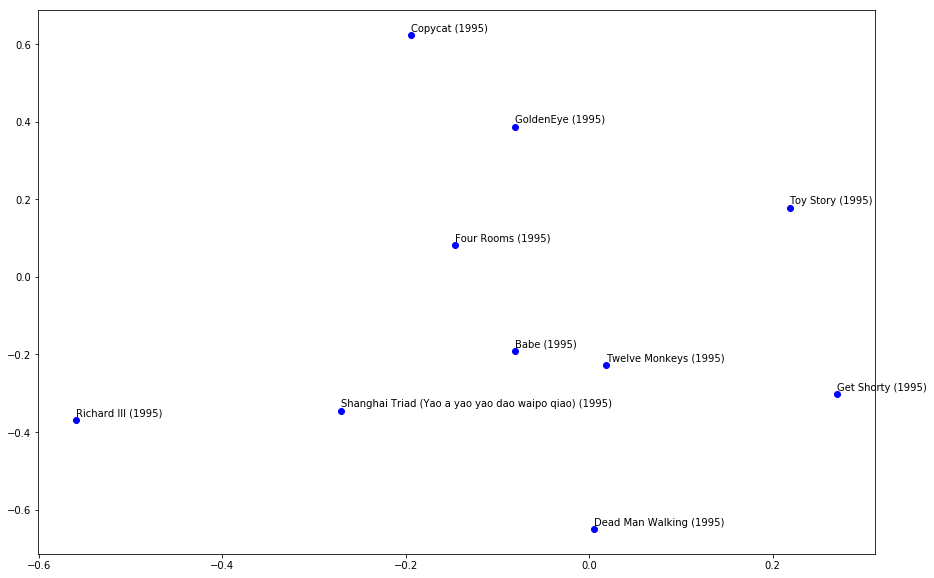

In [92]:
# Let's just take a look at the first ten movies
first_ten = movies[:10]
first_ten_names = [i[1] for i in first_ten]
first_ten_coordinates = proj_v[:10]

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

plt.plot(first_ten_coordinates[:,0], first_ten_coordinates[:,1], 'bo')
for i, (x, y) in enumerate(first_ten_coordinates):
    ax.annotate(first_ten_names[i], xy = (x, y + 0.01))
plt.show()

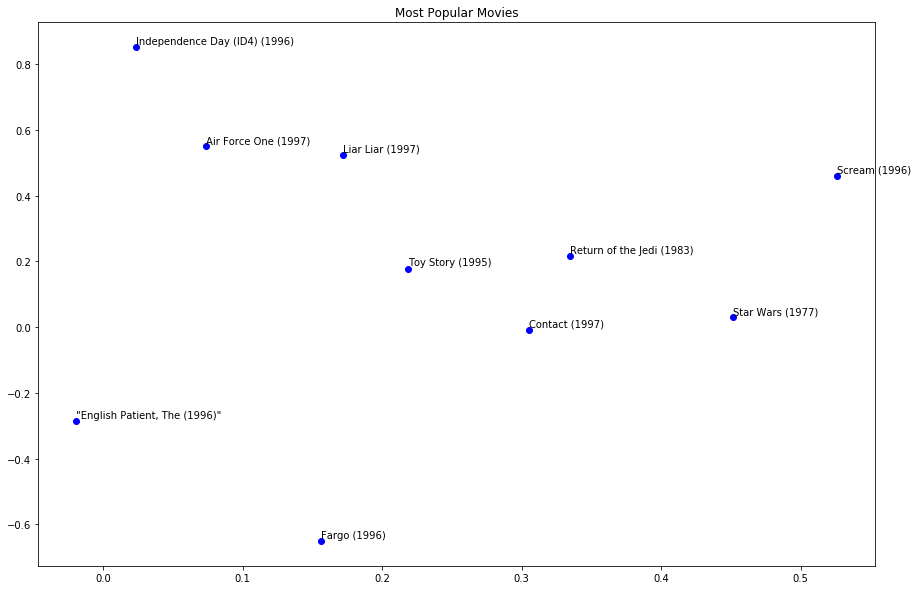

In [102]:
# Now let's find the ten most popular movies (have the most ratings)
movies_scored = ratings[:,1]
movie_num_ratings = {}
for movie_id in movies_scored:
    if movie_id in movie_num_ratings:
        movie_num_ratings[movie_id] += 1
    else:
        movie_num_ratings[movie_id] = 1
movies_sorted = sorted(movie_num_ratings.items(), key=lambda x: x[1], reverse = True)
top_ten_movies = [movie_id for movie_id,_ in movies_sorted][:10]

# Now to find their names and coordinates
top_ten_names = []
top_ten_coordinates = []
for movie_id in top_ten_movies:
    top_ten_names.append(movies[movie_id - 1][1])
    top_ten_coordinates.append(proj_v[movie_id - 1].tolist())
    
# Finally plot everything
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

plt.plot([i[0] for i in top_ten_coordinates], [i[1] for i in top_ten_coordinates], 'bo')
for i, (x, y) in enumerate(top_ten_coordinates):
    ax.annotate(top_ten_names[i], xy = (x, y + 0.01))
plt.title("Most Popular Movies")
plt.show()

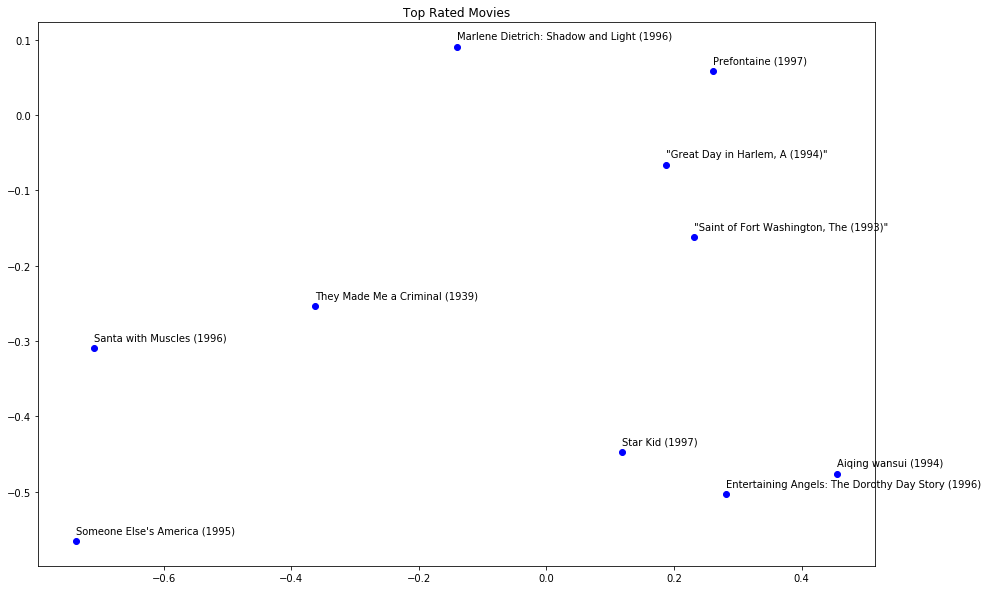

In [103]:
# Now let's find the top ten best rated movies
movie_scores = {}
for _, movie_id, score in ratings:
    if movie_id in movie_scores:
        movie_scores[movie_id].append(score)
    else:
        movie_scores[movie_id] = [score]

movie_avg_score = {
    movie_id: np.sum(scores) / len(scores)
    for movie_id, scores in movie_scores.items()
}

movies_best_sorted = sorted(movie_avg_score.items(), key=lambda x: x[1], reverse = True)
top_ten_best_movies = [movie_id for movie_id,_ in movies_best_sorted][:10]

# Now to find their names and coordinates
top_ten_best_names = []
top_ten_best_coordinates = []
for movie_id in top_ten_best_movies:
    top_ten_best_names.append(movies[movie_id - 1][1])
    top_ten_best_coordinates.append(proj_v[movie_id - 1].tolist())
    
# Finally plot everything
fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

plt.plot([i[0] for i in top_ten_best_coordinates], [i[1] for i in top_ten_best_coordinates], 'bo')
for i, (x, y) in enumerate(top_ten_best_coordinates):
    ax.annotate(top_ten_best_names[i], xy = (x, y + 0.01))
plt.title("Top Rated Movies")
plt.show()

In [104]:
# Returns a list of movie ids associated with a genre
def filter_by_genre(movies, genre):
    genres = ["Unknown", "Action", "Adventure", "Animation", \
              "Childrens", "Comedy", "Crime", "Documentary", \
              "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", \
              "Mystery", "Romance", "Sci-Fi", "Thriller", "War", \
              "Western"]
    
    # Set the correct col_num
    col_num = -1
    for i, g in enumerate(genres):
        if g == genre:
            col_num = i + 2
    
    genre_movies = []
    for movie_id, in_genre in [[i[0], i[col_num]] for i in movies]:
        if in_genre == 1:
            genre_movies.append(movie_id)
            
    return genre_movies

In [106]:
action_movies = filter_by_genre(movies, "Action")
adventure_movies = filter_by_genre(movies, "Adventure")
animation_movies = filter_by_genre(movies, "Animation")

# Grab ten of these movies from each category and plot them
ten_action = action_movies[:10]
ten_adventure = adventure_movies[:10]
ten_animation = animation_movies[:10]

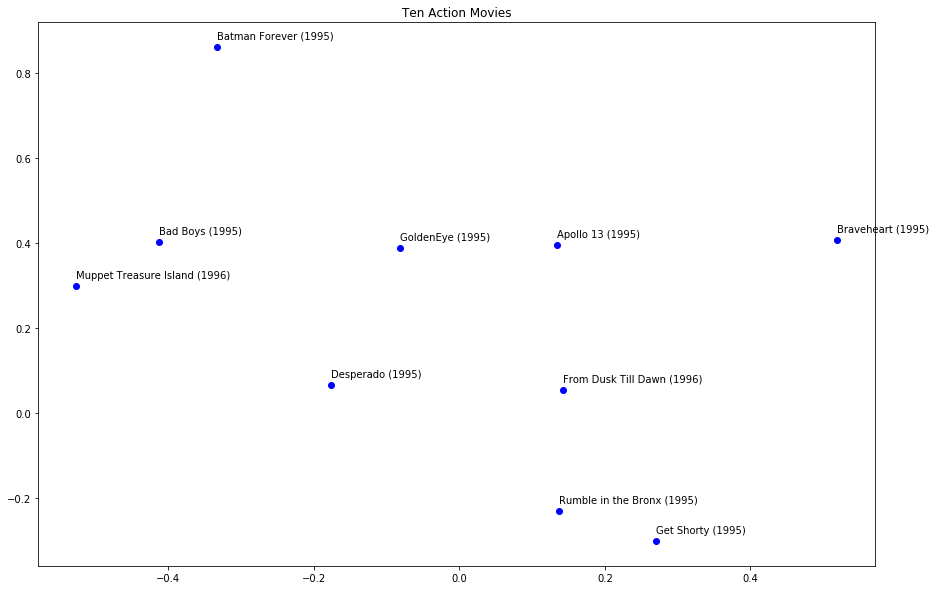

In [112]:
# Action movies
ten_action_names = []
ten_action_coordinates = []
for movie_id in ten_action:
    ten_action_names.append(movies[movie_id - 1][1])
    ten_action_coordinates.append(proj_v[movie_id - 1].tolist())

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

plt.plot([i[0] for i in ten_action_coordinates], [i[1] for i in ten_action_coordinates], 'bo')
for i, (x, y) in enumerate(ten_action_coordinates):
    ax.annotate(ten_action_names[i], xy = (x, y + 0.02))
plt.title("Ten Action Movies")
plt.show()

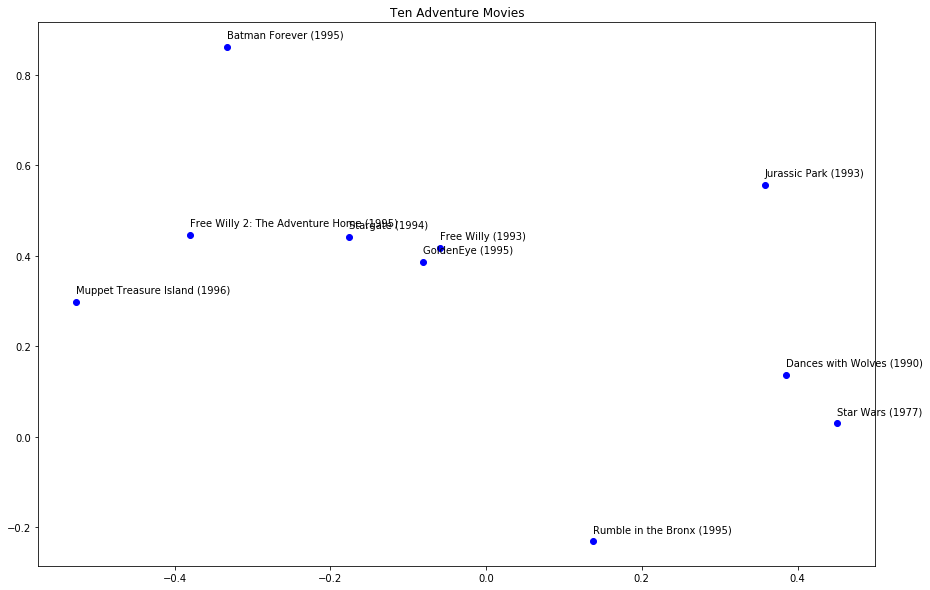

In [114]:
# Adventure movies
ten_adventure_names = []
ten_adventure_coordinates = []
for movie_id in ten_adventure:
    ten_adventure_names.append(movies[movie_id - 1][1])
    ten_adventure_coordinates.append(proj_v[movie_id - 1].tolist())

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

plt.plot([i[0] for i in ten_adventure_coordinates], [i[1] for i in ten_adventure_coordinates], 'bo')
for i, (x, y) in enumerate(ten_adventure_coordinates):
    ax.annotate(ten_adventure_names[i], xy = (x, y + 0.02))
plt.title("Ten Adventure Movies")
plt.show()

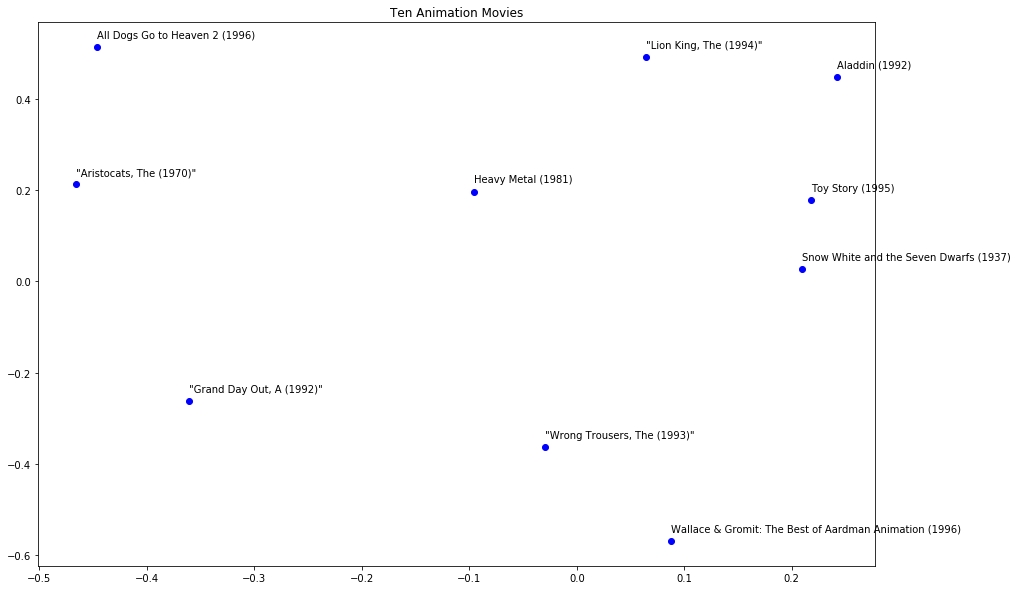

In [116]:
# Animation movies
ten_animation_names = []
ten_animation_coordinates = []
for movie_id in ten_animation:
    ten_animation_names.append(movies[movie_id - 1][1])
    ten_animation_coordinates.append(proj_v[movie_id - 1].tolist())

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

plt.plot([i[0] for i in ten_animation_coordinates], [i[1] for i in ten_animation_coordinates], 'bo')
for i, (x, y) in enumerate(ten_animation_coordinates):
    ax.annotate(ten_animation_names[i], xy = (x, y + 0.02))
plt.title("Ten Animation Movies")
plt.show()

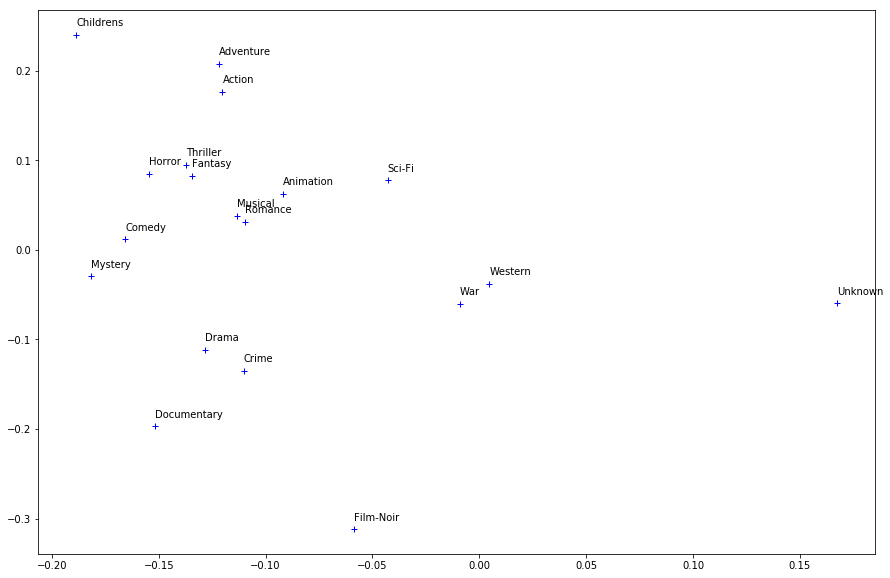

In [137]:
# Let's go ahead and plot the means of each genre
genres = ["Unknown", "Action", "Adventure", "Animation", \
          "Childrens", "Comedy", "Crime", "Documentary", \
          "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", \
          "Mystery", "Romance", "Sci-Fi", "Thriller", "War", \
          "Western"]

fig = plt.figure(figsize = (15, 10))
ax = fig.add_subplot(111)

for genre in genres:
    genre_movies = filter_by_genre(movies, genre)
    genre_coordinates = []
    for movie_id in genre_movies:
        genre_coordinates.append(proj_v[movie_id - 1])
    genre_mean = np.mean(genre_coordinates, axis = 0)
    
    plt.plot(genre_mean[0], genre_mean[1], 'b+')
    ax.annotate(genre, xy = (genre_mean[0], genre_mean[1] + 0.01))
    
plt.show()

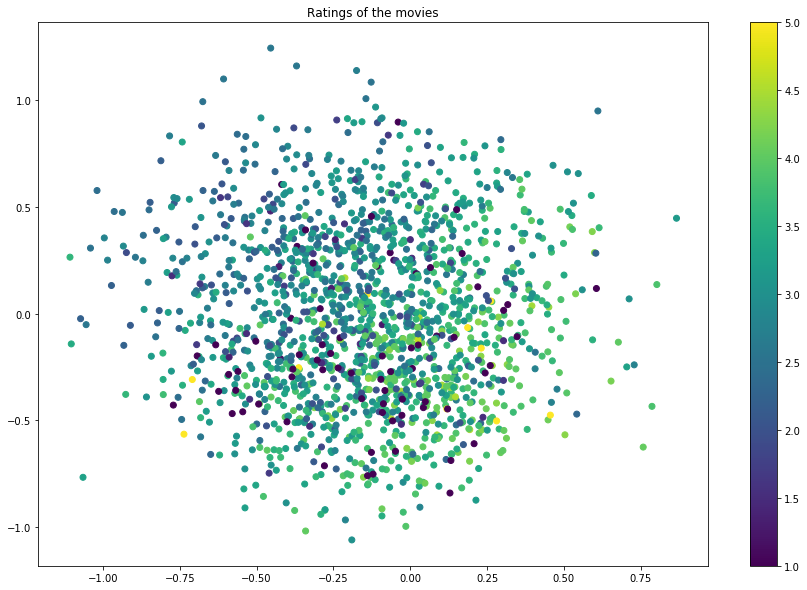

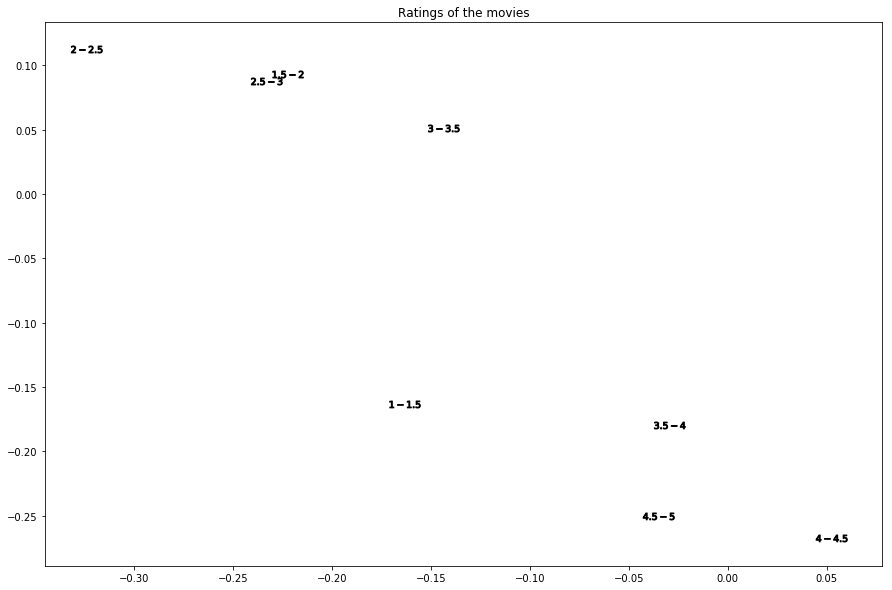

In [198]:
import pylab

# Plot the average rating. (I guess to see if any of these two dimensions are correlated to favorability)
movie_scores = {}
for _, movie_id, score in ratings:
    if movie_id in movie_scores:
        movie_scores[movie_id].append(score)
    else:
        movie_scores[movie_id] = [score]

movie_avg_score = {
    movie_id: np.sum(scores) / len(scores)
    for movie_id, scores in movie_scores.items()
}

movie_avg_score_list = np.zeros(len(movies))
for movie_id, avg_score in movie_avg_score.items():
    movie_avg_score_list[movie_id - 1] = avg_score
    
# Split into 8 different categories based on rating
movies_1_to_1_5 = []
movies_1_5_to_2 = []
movies_2_to_2_5 = []
movies_2_5_to_3 = []
movies_3_to_3_5 = []
movies_3_5_to_4 = []
movies_4_to_4_5 = []
movies_4_5_to_5 = []

for i, avg_score in enumerate(movie_avg_score_list):
    if avg_score <= 1.5:
        movies_1_to_1_5.append(proj_v[i])
    if avg_score > 1.5 and avg_score <= 2:
        movies_1_5_to_2.append(proj_v[i])
    if avg_score > 2 and avg_score <= 2.5:
        movies_2_to_2_5.append(proj_v[i])
    if avg_score > 2.5 and avg_score <= 3:
        movies_2_5_to_3.append(proj_v[i])
    if avg_score > 3 and avg_score <= 3.5:
        movies_3_to_3_5.append(proj_v[i])
    if avg_score > 3.5 and avg_score <= 4:
        movies_3_5_to_4.append(proj_v[i])
    if avg_score > 4 and avg_score <= 4.5:
        movies_4_to_4_5.append(proj_v[i])
    if avg_score > 4.5 and avg_score <= 5:
        movies_4_5_to_5.append(proj_v[i])

movies_1_to_1_5_avg = np.mean(movies_1_to_1_5, axis = 0)
movies_1_5_to_2_avg = np.mean(movies_1_5_to_2, axis = 0)
movies_2_to_2_5_avg = np.mean(movies_2_to_2_5, axis = 0)
movies_2_5_to_3_avg = np.mean(movies_2_5_to_3, axis = 0)
movies_3_to_3_5_avg = np.mean(movies_3_to_3_5, axis = 0)
movies_3_5_to_4_avg = np.mean(movies_3_5_to_4, axis = 0)
movies_4_to_4_5_avg = np.mean(movies_4_to_4_5, axis = 0)
movies_4_5_to_5_avg = np.mean(movies_4_5_to_5, axis = 0)

colors = [movie_avg_score_list[i] for i in range(len(movies))]
pylab.figure(figsize = (15, 10))
pylab.scatter(proj_v[:,0], proj_v[:,1], c = colors, marker = "o")
pylab.colorbar()
pylab.title("Ratings of the movies")
pylab.show()


# Plot the averages each group of ratings
pylab.figure(figsize = (15, 10))
pylab.scatter(movies_1_to_1_5_avg[0], movies_1_to_1_5_avg[1], s = 1000, c = "black", marker = "$1 - 1.5$")
pylab.scatter(movies_1_5_to_2_avg[0], movies_1_5_to_2_avg[1], s = 1000, c = "black", marker = "$1.5 - 2$")
pylab.scatter(movies_2_to_2_5_avg[0], movies_2_to_2_5_avg[1], s = 1000, c = "black", marker = "$2 - 2.5$")
pylab.scatter(movies_2_5_to_3_avg[0], movies_2_5_to_3_avg[1], s = 1000, c = "black", marker = "$2.5 - 3$")
pylab.scatter(movies_3_to_3_5_avg[0], movies_3_to_3_5_avg[1], s = 1000, c = "black", marker = "$3 - 3.5$")
pylab.scatter(movies_3_5_to_4_avg[0], movies_3_5_to_4_avg[1], s = 1000, c = "black", marker = "$3.5 - 4$")
pylab.scatter(movies_4_to_4_5_avg[0], movies_4_to_4_5_avg[1], s = 1000, c = "black", marker = "$4 - 4.5$")
pylab.scatter(movies_4_5_to_5_avg[0], movies_4_5_to_5_avg[1], s = 1000, c = "black", marker = "$4.5 - 5$")
pylab.title("Movies divided by ratings")
pylab.show()